Import dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Load mnist data from keras.datasets

In [2]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data = 60,000 Images

Test data = 10,000 Images

Image dimension --> 28 x 28

Grayscale Image --> 1 channel

In [4]:
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [10]:
print(Y_train[10])

3


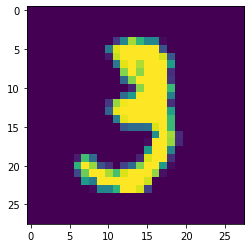

In [5]:
plt.imshow(X_train[10])

In [6]:
print(Y_train[10])

3


In [7]:
print(np.unique(Y_train))

[0 1 2 3 4 5 6 7 8 9]


In [ ]:
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]


One Hot Encoding to make sure all features are in same range

In [11]:
#scaling
X_train = X_train/255

X_test = X_test/255


In [12]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the neural network

In [14]:
#setting up layers of NN
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50,activation='relu'),
                          keras.layers.Dense(50,activation='relu'),
                          keras.layers.Dense(50,activation='sigmoid')

])


In [15]:
#compile
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [16]:
#train
model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3390 - accuracy: 0.9044
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1541 - accuracy: 0.9533
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1139 - accuracy: 0.9664
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0921 - accuracy: 0.9719
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0762 - accuracy: 0.9765
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0642 - accuracy: 0.9797
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0572 - accuracy: 0.9816
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0492 - accuracy: 0.9842
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0439 - accuracy: 0.9856
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.037

In [17]:
#accuracy
loss,accuracy = model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.1075 - accuracy: 0.9708


In [18]:
print(accuracy)

0.97079998254776


Train accuracy : 98%
Test accuracy :97%

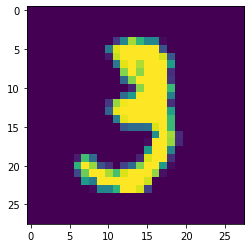

In [20]:
plt.imshow(X_train[10])

In [21]:
print(Y_train[10])

3


0


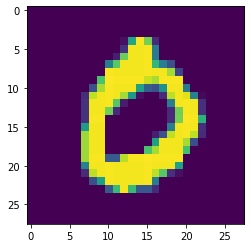

In [23]:
plt.imshow(X_test[3])


In [24]:
print(Y_test[3])

0


model.predict -> gives prediction probability of each class for that data point

In [29]:
#model prediction 
pred = model.predict(X_test)

In [30]:
print(pred[0])

[9.4511807e-03 2.0052135e-02 7.0664120e-01 9.8441255e-01 2.2068734e-05
 1.9915500e-01 1.2483391e-10 9.9999970e-01 6.2227190e-01 9.3288386e-01
 2.0919043e-12 4.0611085e-13 1.0820543e-11 7.8650026e-13 6.2106700e-12
 1.2155681e-11 2.5247833e-11 7.7134021e-11 1.8373357e-11 5.6778860e-13
 2.0944328e-11 8.7479017e-11 3.3243384e-12 1.0391986e-12 1.9691228e-10
 1.5859470e-11 5.3193517e-13 2.8768174e-11 9.0774645e-12 7.8374418e-11
 1.0699132e-11 1.6839378e-12 2.0158507e-13 5.4331255e-11 1.1697833e-11
 2.9372078e-11 3.1279523e-12 4.2351149e-12 1.0694092e-11 7.7752292e-12
 4.2123506e-11 9.9140470e-12 9.0786241e-12 7.2050628e-13 1.2194153e-12
 5.6735015e-13 9.9100389e-12 2.9642096e-12 4.1553341e-11 1.1741096e-13]


In [31]:
print(pred.shape)

(10000, 50)


Convert the prediction probabilities to class label

In [32]:
predic_label = [np.argmax(i) for i in pred]
print(predic_label)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 5, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test --> True labels

Y_pred_labels --> Predicted Labels

Confusin Matrix

In [34]:
conf_matrix = confusion_matrix(Y_test,predic_label)
print(conf_matrix)

tf.Tensor(
[[ 967    0    0    2    0    4    4    1    1    1]
 [   0 1126    2    0    0    2    1    1    3    0]
 [   0    4 1009    4    0    2    4    2    7    0]
 [   0    0    3  958    0   30    1    6    6    6]
 [   1    0    4    1  953    7    6    3    0    7]
 [   2    0    0    4    0  877    3    2    4    0]
 [   2    3    2    1    3   18  928    0    1    0]
 [   2    6    7    1    0    1    0 1000    2    9]
 [   5    2    2    7    5   15    3    4  925    6]
 [   0    4    1    4   10   17    2    3    0  968]], shape=(10, 10), dtype=int32)


Text(0.5, 42.0, 'Predicted Labels')

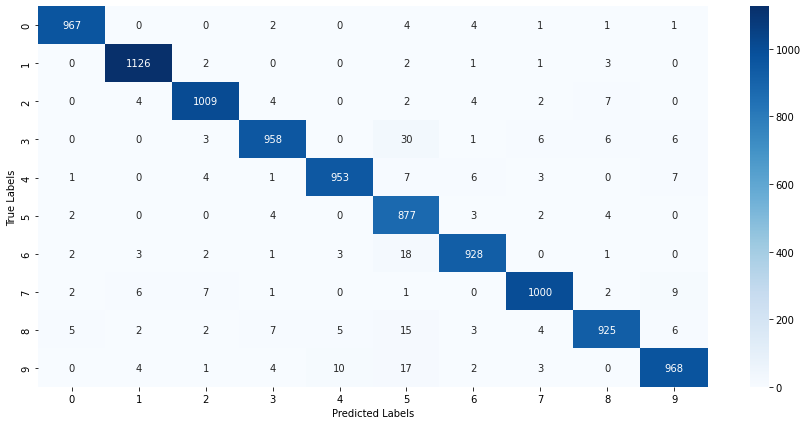

In [36]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

Building a predictive system

Path of the image to be predicted: /7.png


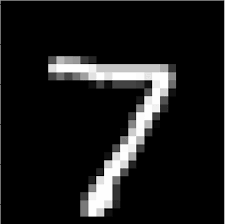

The Handwritten Digit is recognised as  7


In [39]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)